# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing pacf and acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

#importing ARIMA
from statsmodels.tsa.arima_model import ARMA






In [2]:
#Loading the data
data = pd.read_csv('winning_400m.csv')

#Converting year column to date time
data['year'] = pd.to_datetime(data['year'].astype(str))

#Setting index to year
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

In [3]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

<AxesSubplot:xlabel='year'>

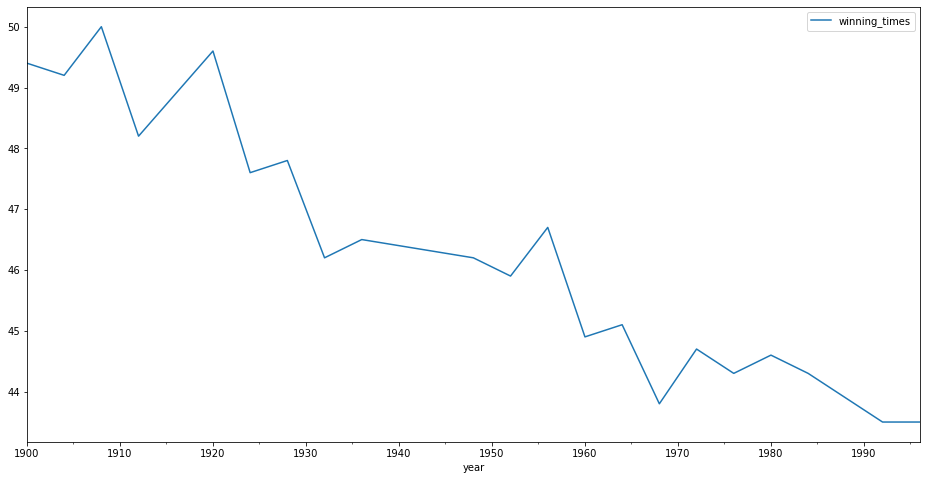

In [4]:
# Plot the time series
data.plot(figsize = (16,8))

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [5]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

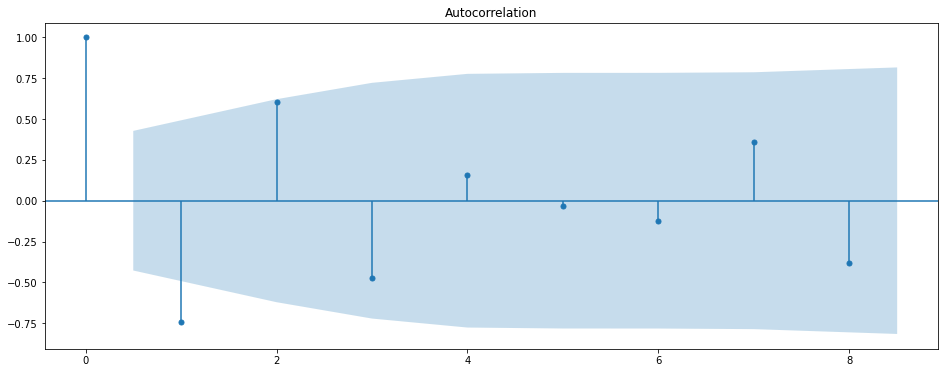

In [6]:
# Plot the ACF
fig, ax = plt.subplots(figsize=(16,6))
plot_acf(data_diff, ax=ax, lags=8);


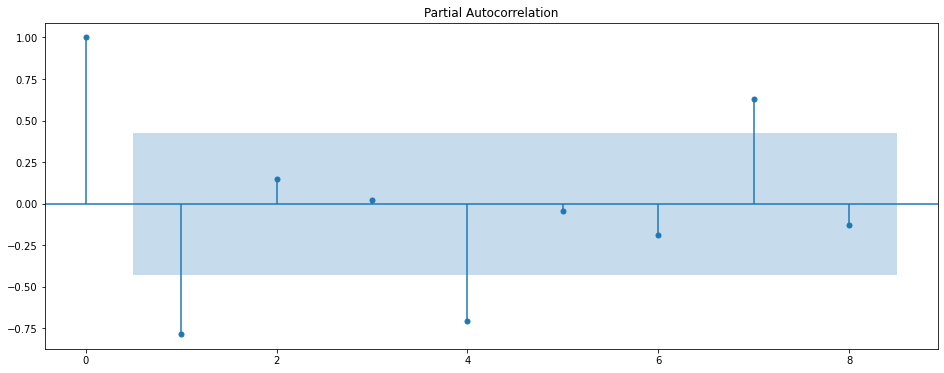

In [7]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(16,6))
plot_pacf(data_diff, ax=ax, lags=8);



Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

* From the acf and pacf plots the order of arma model is ARMA(1,1).This is because on both plots after the first lag the correlation drops into the shaded area

* The shaded area of the graph is the confidence interval. When the correlation drops into the shaded area, that means there is no longer statistically significant correlation between lags.

Before building the ARMA (1,1) I will explore different kinds of models 

In [8]:
#ARMA(0,0)- white noise
model = ARMA(data_diff, order=(0,0))
arma = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34663D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   1.347D+00
  F =   1.3466287700323478     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [9]:
#White noise summary
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(0, 0)   Log Likelihood                 -28.279
Method:                           css   S.D. of innovations              0.930
Date:                Tue, 23 Aug 2022   AIC                             60.558
Time:                        07:32:42   BIC                             62.647
Sample:                    12-31-1904   HQIC                            61.012
                         - 12-31-1996                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2810      0.203     -1.384      0.166      -0.679       0.117
==============================================================================
"""

In [10]:
#ARMA(1,0)model 
model1 = ARMA(data_diff, order=(1,0))
arma1 = model1.fit()



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.56186D-01    |proj g|=  1.76862D-02

At iterate    5    f=  9.54937D-01    |proj g|=  9.54792D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7      9      1     0     0   3.331D-08   9.549D-01
  F =  0.95493659696888056     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [11]:
# summary information on the fit
arma1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Tue, 23 Aug 2022   AIC                             46.107
Time:                        07:32:42   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3916           +0.0000j            1.3916            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
#ARMA(0,1)model 
model2 = ARMA(data_diff, order=(0,1))
arma2 = model2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07916D+00    |proj g|=  2.76432D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4     10      1     0     0   2.220D-08   1.079D+00
  F =   1.0787631764581413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
/home/elsie/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [13]:
#Summary of the model
arma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(0, 1)   Log Likelihood                 -22.654
Method:                       css-mle   S.D. of innovations              0.661
Date:                Tue, 23 Aug 2022   AIC                             51.308
Time:                        07:32:43   BIC                             54.442
Sample:                    12-31-1904   HQIC                            51.988
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3108      0.022    -13.990      0.000      -0.354      -0.267
ma.L1.winning_times    -1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [14]:
#ARMA(1,1)
model3 = ARMA(data_diff,order = (1,1))
arma3 = model3.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.52012D-01    |proj g|=  2.64070D-02

At iterate    5    f=  9.50381D-01    |proj g|=  5.30133D-03

At iterate   10    f=  9.50371D-01    |proj g|=  1.11022D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   1.110D-08   9.504D-01
  F =  0.95037074472859018     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [15]:
#Summarry of arma3
arma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Tue, 23 Aug 2022   AIC                             47.916
Time:                        07:32:43   BIC                             52.094
Sample:                    12-31-1904   HQIC                            48.822
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.001      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_times     0.1172      0.254      0.462      0.644      -0.380       0.614
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2974           +0.0000j            1.2974            0.5000
MA.1           -8.5305           +0.0000j            8.5305            0.5000
-----------------------------------------------------------------------------
"""

In [16]:
# Getting the best model using AIC as my criterion
print("white_noise AIC:{}".format(arma.aic))
print("ARMA(1,0) AIC:{}".format(arma1.aic))
print("ARMA(0,1) AIC:{}".format(arma2.aic))
print("ARMA(1,1) AIC:{}".format(arma3.aic))

white_noise AIC:60.55840834135861
ARMA(1,0) AIC:46.107337072692985
ARMA(0,1) AIC:51.308053411241936
ARMA(1,1) AIC:47.91557127860079


## What is your final model? Why did you pick this model?

In [17]:
# Your comments here
"""
My final model is ARMA(1,0),since it gives the lowest AIC value compared to the other models
"""

'\nMy final model is ARMA(1,0),since it gives the lowest AIC value compared to the other models\n'

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 